# Example notebook for using RS propagation from propagate module 

In the following we exemplify Rayleigh-Sommerfeld (RS) propagation from aperture masks generate via the ``generate`` module illuminated with plane waves, using the ``propagate`` module. In particular:
* Several examples of RS propagations in Z axis, YZ and XY planes:
    * RS propagation from masks defined from library functions apertures (e.g. Fresnel lenses)
    * RS propagation from masks of a Spiral Phase Plate 
    * RS propagation from masks defined from arbitrarily defined functions (Zoom lens)

In the ``propagate`` module, Rayleigh-Sommerfeld propagation is implemented via direct numerical integration of the double integral (e.g. Goodman Fourier Optics textbook as reference), making it (very) time-consuming, yet exact. 

Fresnel and Fraunhofer propagations provide acceptable approximations for the propagation in some ranges. In the ``propagate`` module these approximations have been implemented following the Goodman Fourier Optics textbook. For simple use examples of Fresnel and Fraunhofer propagations check propopt package https://github.com/cunhaJ/propopt . A dedicated notebook in pyMOE package will exemplify their application to more complex apertures and masks. 
    

In [2]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  
from pyMOE.propagate import * 

## RS propagation from a Fresnel multilevel mask example #1

<IPython.core.display.Javascript object>


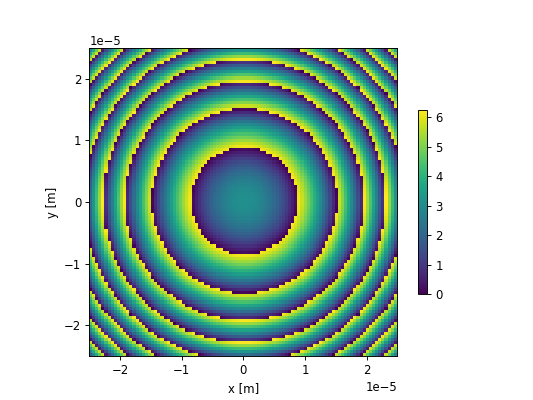

../..\pyMOE\plotting.py:53: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = plt.pcolormesh(aperture.x/scale_factor, aperture.y/scale_factor, aperture.aperture,)


<IPython.core.display.Javascript object>


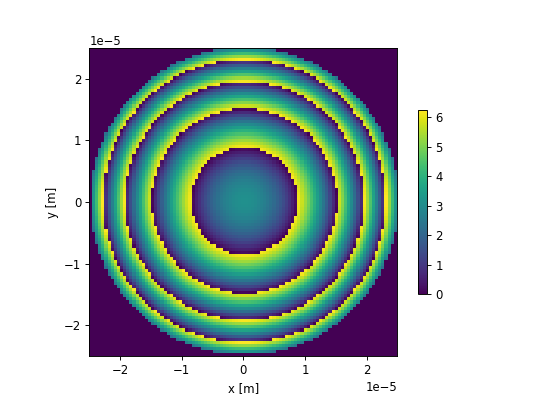

<IPython.core.display.Javascript object>


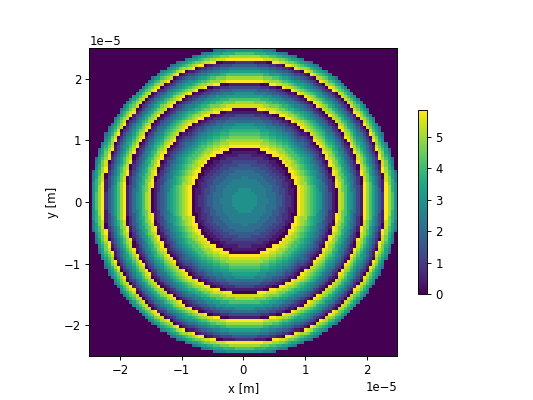

<IPython.core.display.Javascript object>


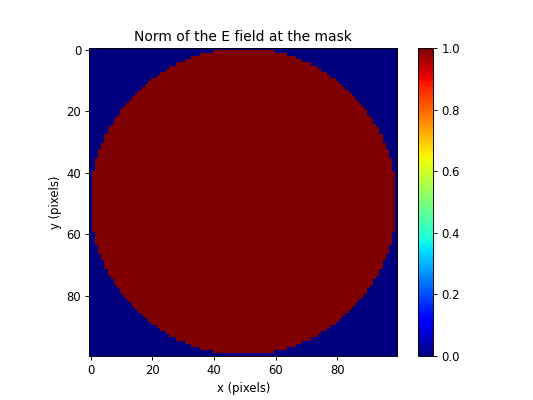

<IPython.core.display.Javascript object>


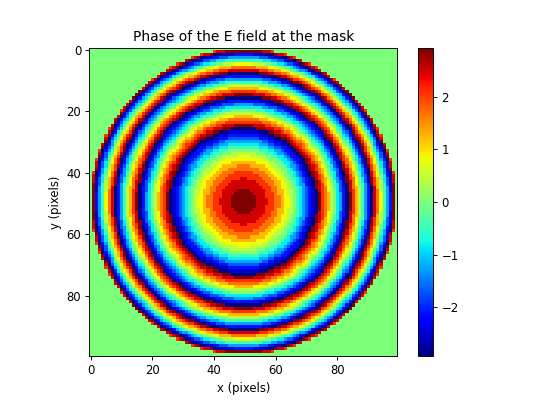

Text(0, 0.5, 'y (pixels)')

In [3]:
#number of pixels 
npix = 100

#size of the rectangular mask 
xsiz = 50e-6 #xsize in um 
ysiz = 50e-6
pixsize = 1e-6 #m
lda = 500e-9 #m
foc = 150e-6
zmin = lda
zmax = 1.2* foc 
nzs= npix*8+1

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = np.linspace(0, 2*np.pi, 16)

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")


In [5]:
##Propagate field and calculate in plane XY 
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] #E field 

Progress: [####################] 100.0%
Elapsed: 0:00:12.292660


<IPython.core.display.Javascript object>


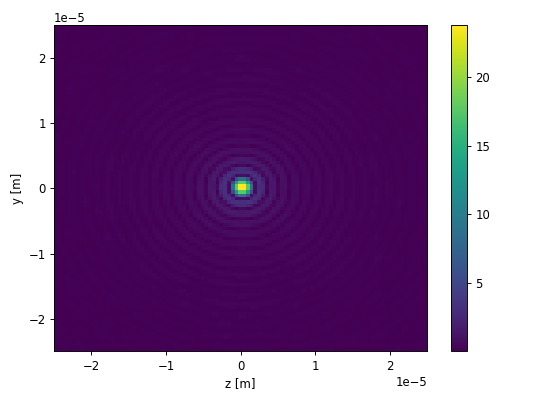

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [6]:
fig = plt.figure() 

xp = np.linspace(xminus,xplus,npix)
yp = xp

plt.pcolormesh(xp,yp,np.abs(z1) )

plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()
plt.colorbar()
plt.savefig("FresnelN16-XY.png")

In [5]:
####Propagate field and calculate in plane YZ, using 100 bins in Y
nxcuts = 100
RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] #E field 

Progress: [####################] 100.0%
Elapsed: 0:01:40.203701


<IPython.core.display.Javascript object>


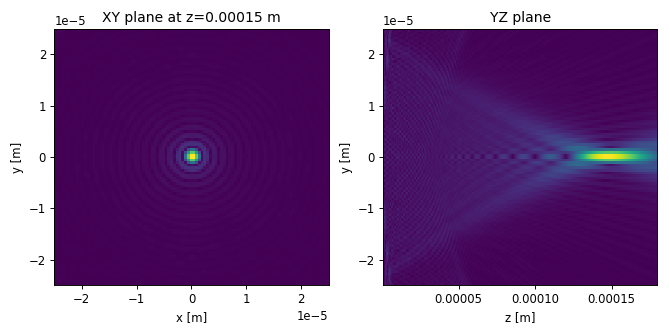

In [6]:
###Plot the two fields in same panel 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

In [7]:
##Propagate field using RS integral using bins 
#-> Results in a faster calculation just for fast inspection, however, use with care, due to possible bluring effects
nxcuts = 25

##Propagate field and calculate in plane XY 
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, nxcuts, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] #E field 


RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:00:00.752703
Progress: [####################] 100.0%
Elapsed: 0:00:24.884017


<IPython.core.display.Javascript object>


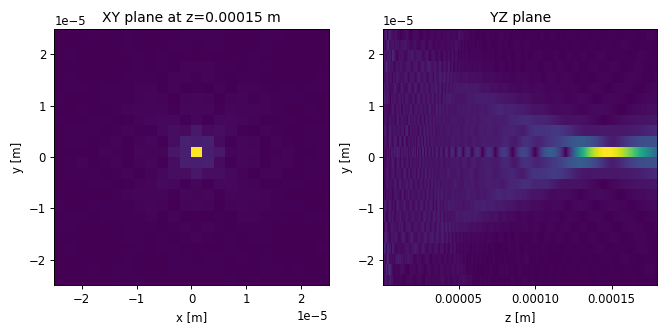

In [8]:
###Plot the two fields in same panel 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

## RS propagation from a Fresnel multilevel mask example #2

<IPython.core.display.Javascript object>


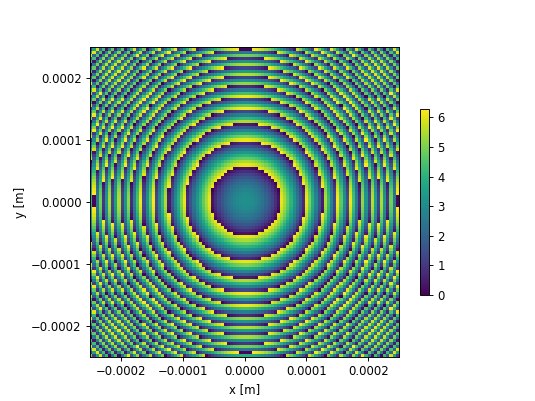

<IPython.core.display.Javascript object>


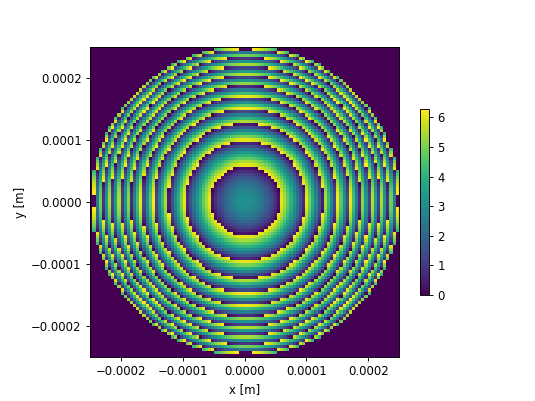

<IPython.core.display.Javascript object>


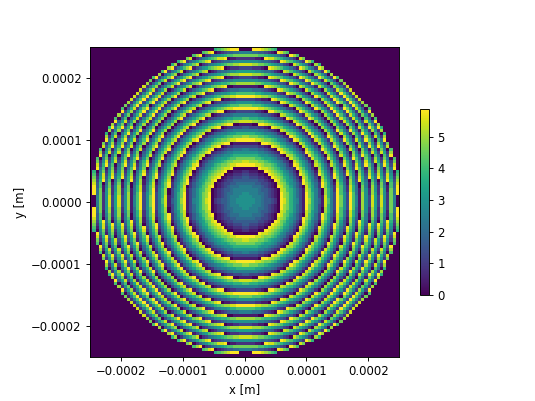

<IPython.core.display.Javascript object>


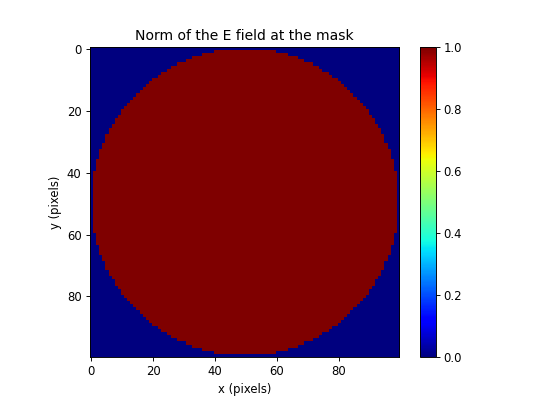

<IPython.core.display.Javascript object>


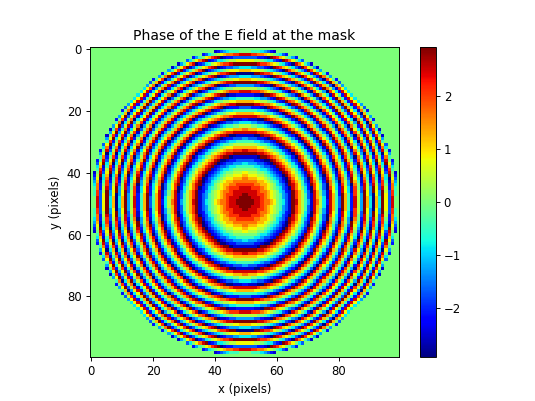

Text(0, 0.5, 'y (pixels)')

In [9]:
#number of pixels 
npix = 100

#size of the rectangular mask 
xsiz = 500e-6 #xsize in um 
ysiz = 500e-6
pixsize =  xsiz/npix #m
lda = 632.8e-9 #m
foc = 5000e-6
zmin = lda
zmax = 1.2* foc 
nzs= npix*8+1

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = np.linspace(0, 2*np.pi, 16)

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [10]:
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix*4, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] ##E field

nxcuts = npix
RS_resultsyz = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, nxcuts, xplus, xplus, lda,1, verbose=True)
field2 = RS_resultsyz[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:03:19.190241
Progress: [####################] 100.0%
Elapsed: 0:01:41.887248


<IPython.core.display.Javascript object>


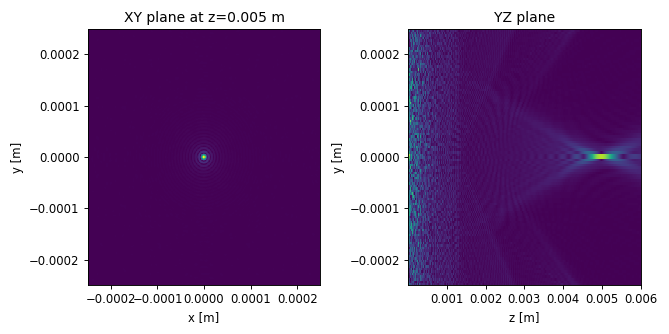

In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])

z2 = RS_resultsyz[0]
xp2 = np.linspace(xminus,xplus,z2.shape[0])
zp2 = np.linspace(zmin,zmax,z2.shape[1])

ax1.title.set_text('XY plane at z='+str(foc)+' m')
ax1.pcolormesh(xp1,yp1,np.abs(z1) )
ax2.title.set_text('YZ plane')
ax2.pcolormesh(zp2,xp2,np.abs(z2) )


ax1.set(xlabel="x [m]", ylabel="y [m]")
ax2.set(xlabel="z [m]", ylabel="y [m]")

plt.tight_layout()

## RS propagation from a Fresnel Zone Plate

<IPython.core.display.Javascript object>


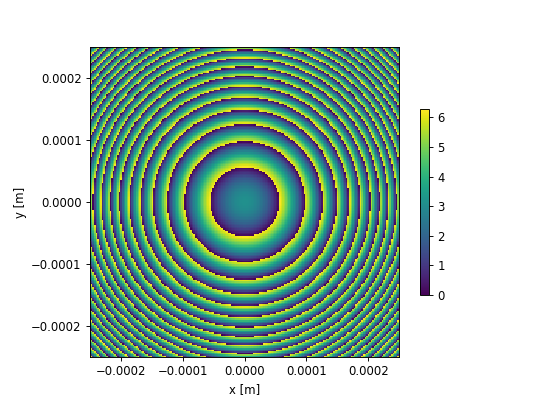

<IPython.core.display.Javascript object>


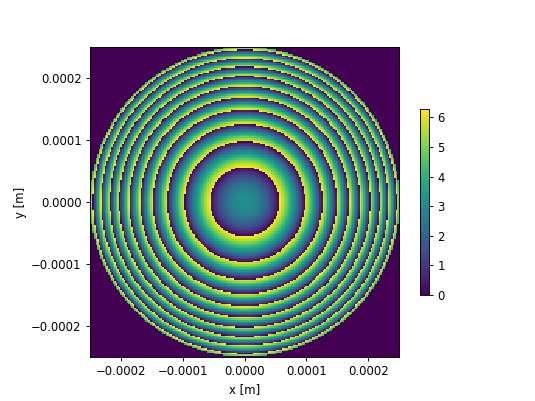

<IPython.core.display.Javascript object>


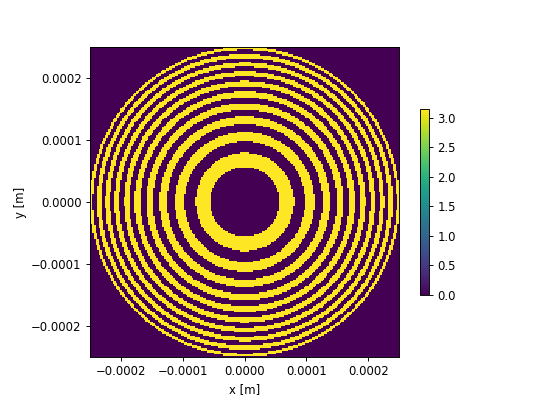

<IPython.core.display.Javascript object>


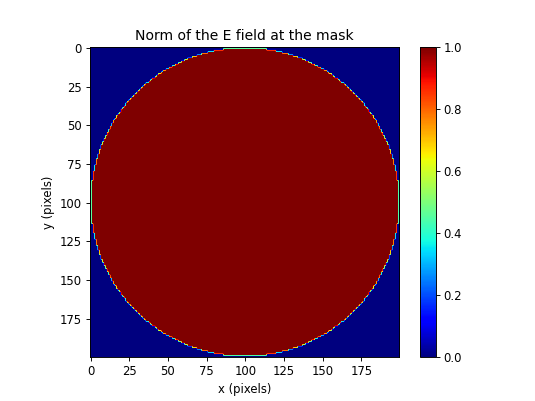

<IPython.core.display.Javascript object>


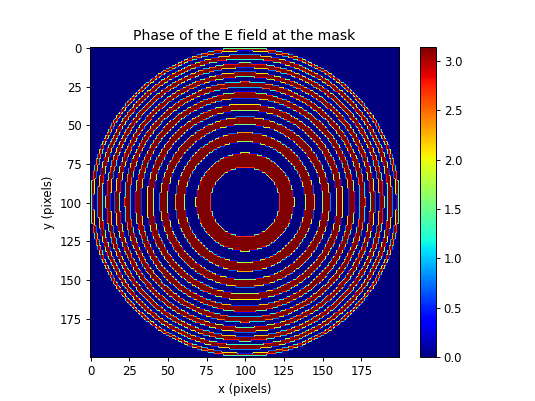

Text(0, 0.5, 'y (pixels)')

In [12]:
####generate a fresnel zone plate 
#number of pixels 
npix = 200

#size of the rectangular mask 
xsiz = 500e-6 #xsize in um 
ysiz = 500e-6
pixsize =  xsiz/npix #m
lda = 632.8e-9 #m
foc = 5000e-6
zmin = lda
zmax = 1.2* foc 
nzs= 256

E0 = 1 #incoming field amplitude, arbitrary value 

#half screen size 
xminus = -xsiz/2 
xplus = xsiz/2 

#Select exact position of contours  in phase
phas_vals = [ 0, np.pi]

###Fresnel phase mask 
aperture1 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask1 = moe.generate.fresnel_phase(aperture1, foc, lda )
moe.plotting.plot_aperture(mask1, )


##############
###Fresnel mask with a truncated circular aperture 

# Create empty mask
aperture2 = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)

# and truncate around radius
mask2 = moe.generate.fresnel_phase(aperture2, foc, lda, radius=xsiz/2)
moe.plotting.plot_aperture(mask2, )

#discretize mask in number of levels
mask2.discretize(np.array( phas_vals)[:] ) 
moe.plotting.plot_aperture(mask2)

############
##define the electric field at mask  
fmask = mask2.aperture
Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask2.XX**2+mask2.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [13]:
##Propagate field using RS integal 
RS_results2 = moe.propagate.RS_intZZ(zmin,zmax,nzs,0,0, Em, npix, pixsize, npix, xplus, xplus, lda,1, verbose=True)
field2 = RS_results2[2] ##Intensity log 


Progress: [####################] 100.0%
Elapsed: 0:00:01.238568


<IPython.core.display.Javascript object>


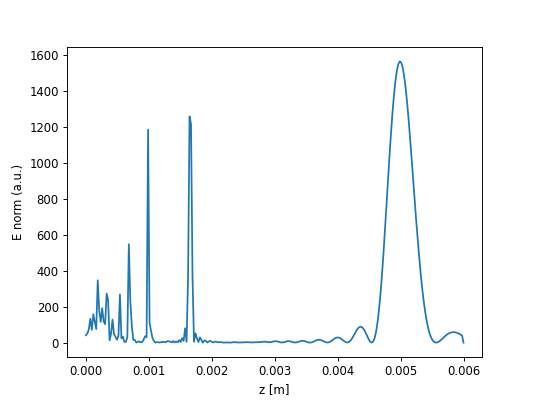

In [14]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
ef = RS_results2[1]

plt.plot(zp,ef)
plt.xlabel("z [m]")
plt.ylabel("E norm (a.u.)")

plt.savefig("FZP-Zprop.png")


In [15]:
####Propagate field and calculate in plane YZ, using npix bins in Y
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:03:22.894271


<ipython-input-16-adbc1659da14>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


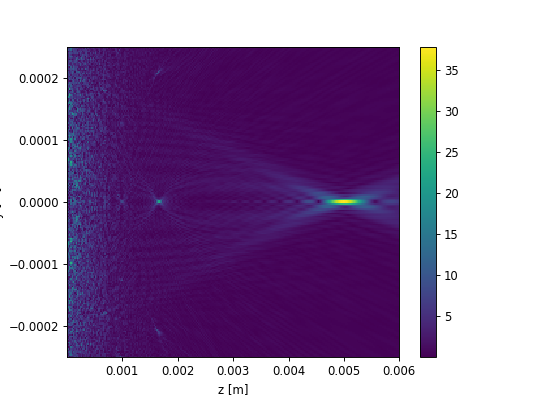

In [16]:
##Plot the YZ propagation 
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("FresnelN2-YZ.png")

## RS propagation from a Spiral Phase Plate

<IPython.core.display.Javascript object>


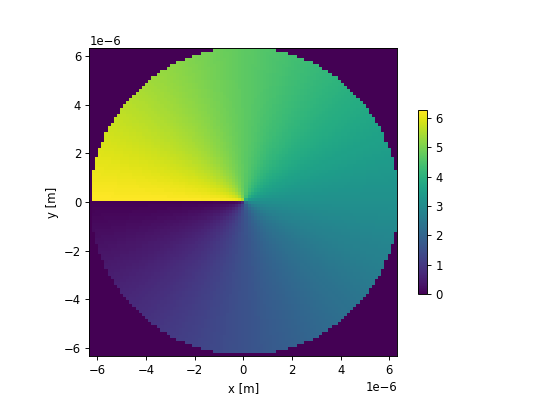

<IPython.core.display.Javascript object>


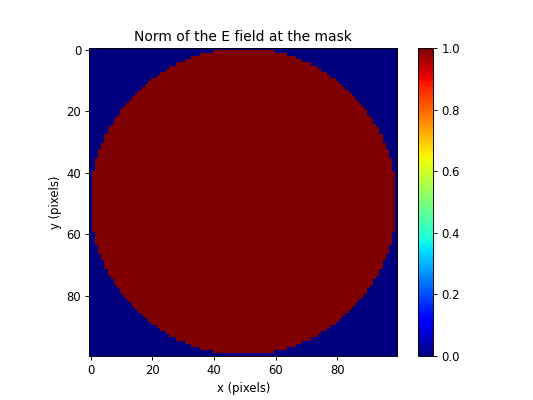

<IPython.core.display.Javascript object>


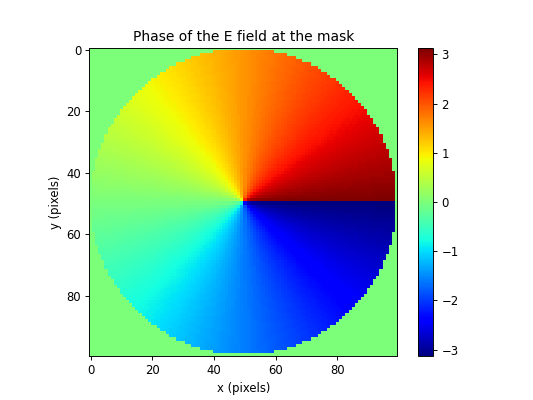

Text(0, 0.5, 'y (pixels)')

In [29]:
####Spiral Phase plate 

####generate a fresnel zone plate 
npix =100 # nr of pixels 
lda = 632.8e-9 #wavelength in m 
foc = 100*lda # focal distance in m
xsiz = 20*lda  #x-sizes 
ysiz = 20*lda #y-size in pixels 
pixsize = xsiz/npix

xplus=xsiz/2
xminus = -xplus 

ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)
    
def spiral(x,y,x0,y0,L):
    """
    returns a spiral COMPLEX PHASE with input meshgrid (x,y) with center at (x0,y0)
    x = x array from meshgrid 
    y = y array from meshgrid 
    x0 = x-coordinate of center of the lens 
    y0 = y-coordinate of center of the lens
    L = topological charge 
    """

    theta = np.arctan2((y-y0),(x-x0))
    sp = np.exp(1.0j*L*theta)
    return sp
    

n =10 # number of gray levels 

center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.spiral, center=center, L=ltop)
mask.aperture = mask.aperture + np.pi 

mask.aperture[np.where(mask.XX**2+mask.YY**2>(xsiz/2)**2 ) ] =0 
moe.plotting.plot_aperture(mask)

fmask = mask.aperture

Em = E0 * np.exp(1.0j*fmask)
Em[np.where(mask.XX**2+mask.YY**2>(xsiz/2)**2 ) ] =0


##plot fields at mask 
fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [30]:
RS_resultsxy = moe.propagate.RS_intXY(foc, Em, npix, pixsize, npix, xplus, xplus, lda, verbose=True)
z1 = RS_resultsxy[0] ##E field

Progress: [####################] 100.0%
Elapsed: 0:00:13.551561


<IPython.core.display.Javascript object>


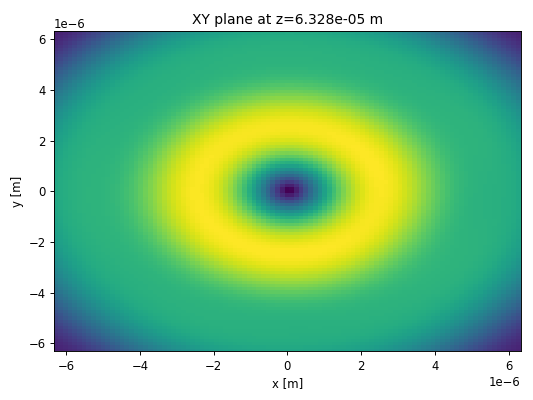

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [35]:
fig = plt.figure()

z1 = RS_resultsxy[0]
xp1 = np.linspace(xminus,xplus,z1.shape[0])
yp1 = np.linspace(xminus,xplus,z1.shape[1])


plt.pcolormesh(xp1,yp1,np.abs(z1) )
plt.title('XY plane at z='+str(foc)+' m')

plt.xlabel("x [m]")
plt.ylabel("y [m]")

plt.tight_layout()

In [32]:
####Propagate field and calculate in plane YZ, using npix bins in Y
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0, Em, npix, pixsize, npix, xplus, xplus, lda,1,verbose=True)
field = RS_results[0] ##E field 

Progress: [####################] 100.0%
Elapsed: 0:01:53.247542


<IPython.core.display.Javascript object>


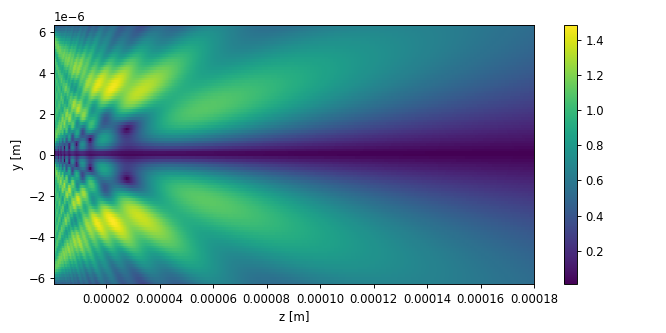

C:\Users\jcunha377\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


In [44]:
##Plot the YZ propagation 
fig = plt.figure(figsize=(8,4)) 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(xminus,xplus,npix)
z = field

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.tight_layout()

plt.savefig("Spiral-YZ.png")

## RS propagation from a user-defined Zoom lens 

<IPython.core.display.Javascript object>


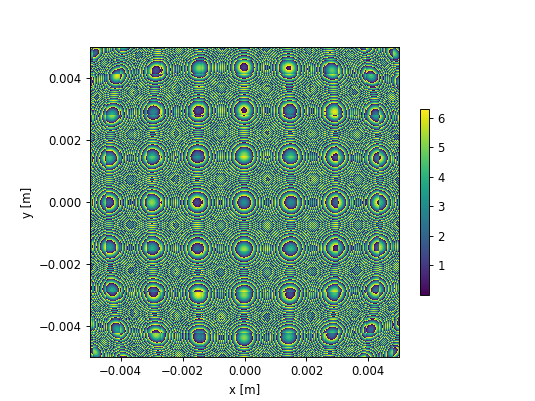

<IPython.core.display.Javascript object>


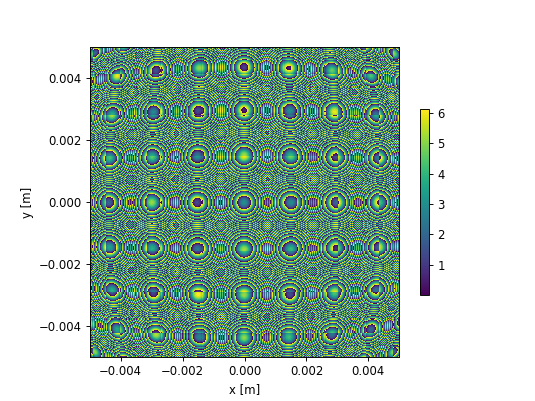

In [20]:
#####################
#Zoom lens 

npix = 2500# nr of pixels 
#foc = 25000*1e-6 # focal distance in um 
lda = 1.55e-6 #wavelength in um 
xsiz = 10e-3 #x-sizes 
ysiz = 10e-3 #y-size in pixels 
pixsize =4e-6
E0=1

##definition of Zoom lens profile function, please check publication for more details 
#https://doi.org/10.1016/j.mne.2022.100111
def zoom_lens1(x,y):
    """
    returns the zoom lens1 phase profile 
    """
    R, k, a2, a4, a6, a8 =-7.899e3, 3.406e5, -8.96e-7, -4.059e-8, 3.24e-9, -6.076e-11
    
    rad = np.sqrt((x*1e3)**2 + (y*1e3)**2)
    
    C=1/R
    
    sag = C*rad**2 /(np.sqrt(1-C**2 * rad**2 *(k+1)) +1) + a2*rad**2 + a4*rad**4 + a6*rad**6 + a8*rad**8
    sag = sag*1e3
    
    phi = sag*(1000-1)
    #sagf = phi/(1.59654-1)
    return np.angle(np.exp(1.0j*phi)) + np.pi

n =40 #number of gray levels 

center = (0, 0)

aperture = moe.generate.create_empty_aperture(-xsiz/2, xsiz/2, npix, -ysiz/2, ysiz/2, npix,)
mask =  moe.generate.arbitrary_aperture_function(aperture,zoom_lens1, center=center,)

moe.plotting.plot_aperture(mask)

plt.savefig("zoomlens1.png")

mask.discretize(n)
moe.plotting.plot_aperture(mask) 

plt.savefig("zoomlens1-discretized.png")

fmask = mask.aperture

<ipython-input-21-e462ae13a8f6>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


<IPython.core.display.Javascript object>


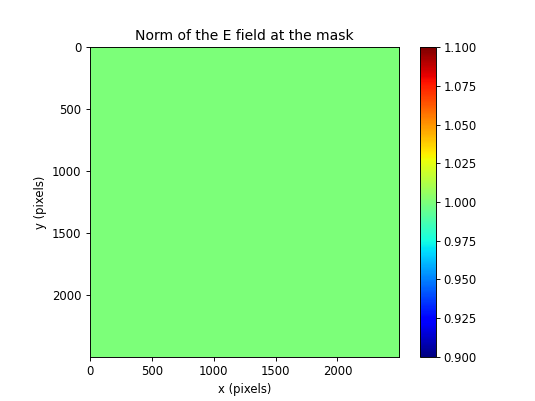

<ipython-input-21-e462ae13a8f6>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


<IPython.core.display.Javascript object>


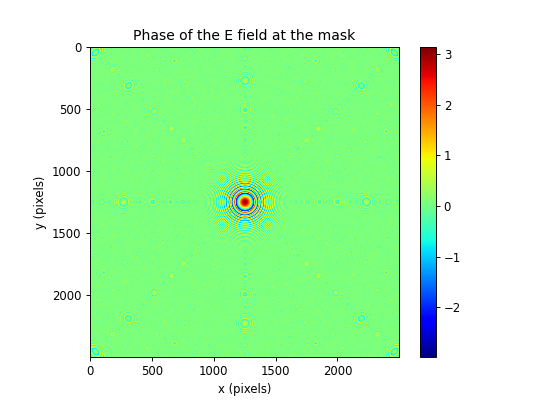

Text(0, 0.5, 'y (pixels)')

In [21]:
##Electric field at mask 
Em = E0 * np.exp(1.0j*fmask)

fig=plt.figure()
plt.imshow(np.abs(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Norm of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

fig=plt.figure()
plt.imshow(np.angle(Em), cmap=plt.get_cmap("jet"))
plt.colorbar()
plt.title("Phase of the E field at the mask")
plt.xlabel("x (pixels)")
plt.ylabel("y (pixels)")

In [22]:
##params for propagation along optical axis 
zmin = lda
zmax =25000 * 1e-6
nzs=100

xplus=xsiz

In [23]:
###Calculation of a Z cut along the optical axis 
nzs = 256 #number of steps in Oz 
nxs = 1 #1 cut along x
RS_results3 = moe.propagate.RS_intZZ(zmin,zmax,nzs,0,0,Em, npix, pixsize, nxs, xplus, xplus, lda, 1.59654, verbose=True)
field3 = RS_results3[0] ##E field

Progress: [####################] 100.0%
Elapsed: 0:05:49.496401


<ipython-input-24-880de6f92191>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


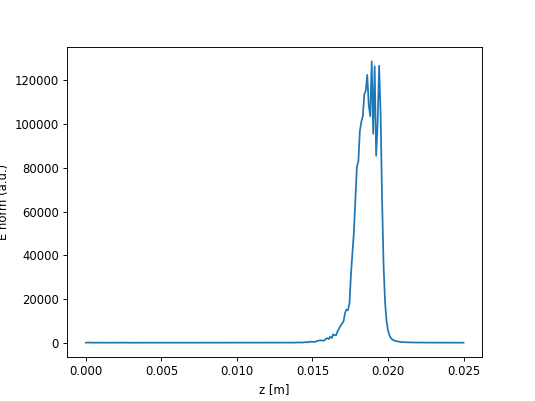

In [24]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,256)
ef = RS_results3[1] #Field intensity 

plt.plot(zp,ef)
plt.xlabel("z [m]")
plt.ylabel("E norm (a.u.)")

plt.savefig("Zoom-lens-optical-axis-cut.png")

-0.005
Progress: [####################] 100.0%
Elapsed: 0:02:15.176877


<ipython-input-25-d6e93a4749ef>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


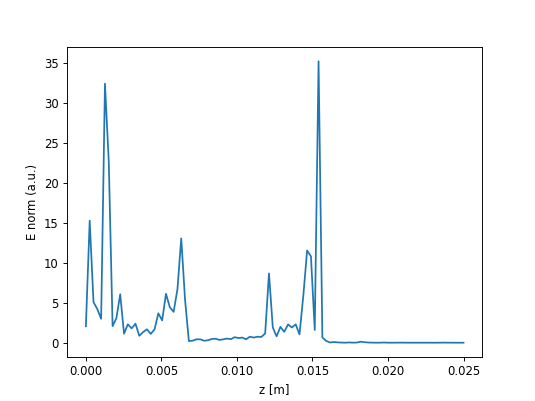

-0.0025
Progress: [####################] 100.0%
Elapsed: 0:02:12.131914


<ipython-input-25-d6e93a4749ef>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


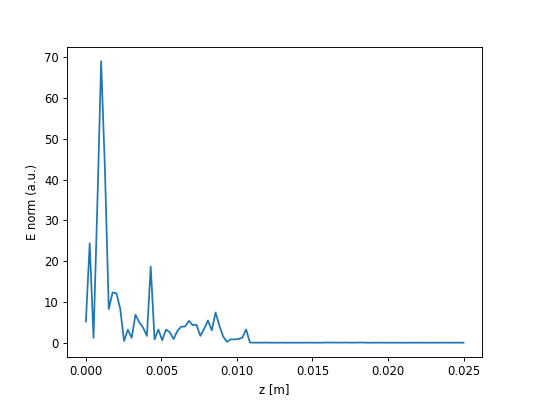

0.0
Progress: [####################] 100.0%
Elapsed: 0:02:12.196930


<ipython-input-25-d6e93a4749ef>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


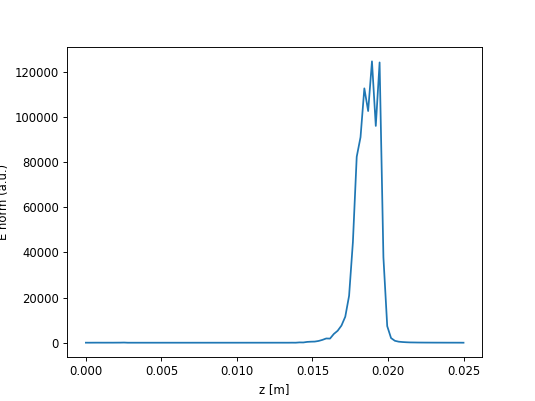

0.0024999999999999996
Progress: [####################] 100.0%
Elapsed: 0:02:12.019893


<ipython-input-25-d6e93a4749ef>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


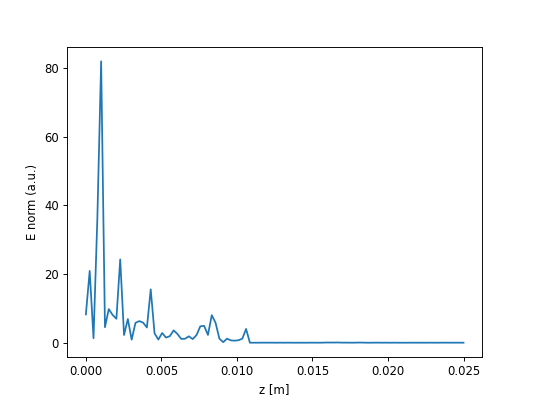

0.005
Progress: [####################] 100.0%
Elapsed: 0:02:12.166289


<ipython-input-25-d6e93a4749ef>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


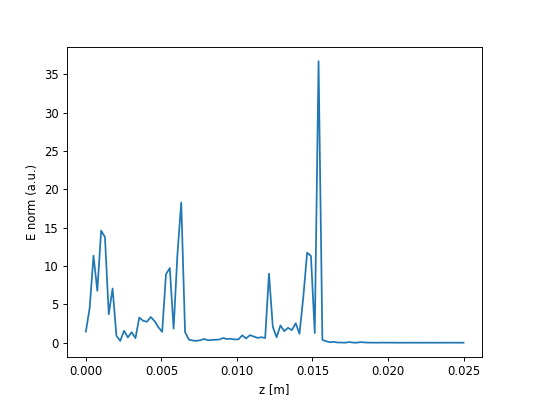

In [25]:
####ZZ cuts all over the YZ plane 
npix = 2500# nr of pixels 
foc = 25000*1e-6 # focal distance in um 
lda = 1.55e-6 #wavelength in um 
xsiz = 10e-3 #x-sizes 
ysiz = 10e-3 #y-size  
a = xsiz/2
nzs = 100
nxs = 1
ncuts = 5

##loop to calculate several cuts 
for iv, xval in enumerate(np.linspace(-a,a,ncuts)):
    #print(iv/ncuts)
    print(xval)
    RS_results3 = moe.propagate.RS_intZZ(zmin,zmax,nzs,xval ,0,Em, npix, pixsize, nxs, xplus, xplus, lda, 1.59654, verbose=False)

    zp = np.linspace(zmin,zmax,nzs)
    ef = RS_results3[1]
    
    fig = plt.figure() 
    plt.plot(zp,ef) 
    plt.xlabel("z [m]")
    plt.ylabel("E norm (a.u.)")
    
    plt.savefig("z_prop_atx="+str(xval)+".png")



In [26]:
###YZ RS calculation
###ATTENTION, takes about 1 hour 

ncuts = 25
nzs = 100
RS_results = moe.propagate.RS_intYZ(zmin,zmax,nzs,0,Em, npix, pixsize, ncuts, xplus/2, xplus/2, lda, 1.59654, verbose=True)
field = RS_results[1] ##intensity 

Progress: [####################] 100.0%
Elapsed: 0:55:03.856589


<ipython-input-27-3faeff6c8052>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


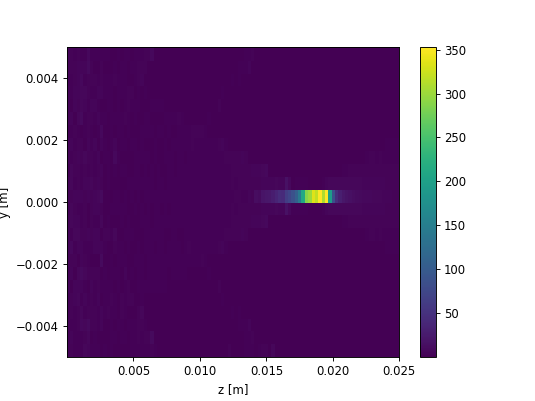

In [27]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(-xplus/2,xplus/2,ncuts)
z = RS_results[0]

plt.pcolormesh(zp,yp,np.abs(z) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("Zoom-lens-YZ.png")

<ipython-input-28-6f54ca76701d>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


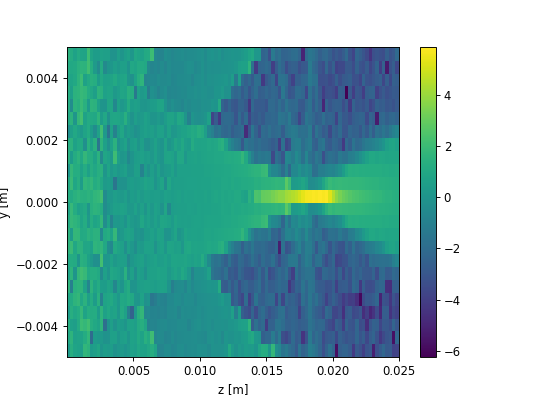

<ipython-input-28-6f54ca76701d>:7: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(zp,yp,np.log(np.abs(z)) )


In [28]:
fig = plt.figure() 

zp = np.linspace(zmin,zmax,nzs)
yp = np.linspace(-xplus/2,xplus/2,ncuts)
z = RS_results[0]

plt.pcolormesh(zp,yp,np.log(np.abs(z)) )
plt.colorbar()
plt.xlabel("z [m]")
plt.ylabel("y [m]")

plt.savefig("Zoom-lens-YZ-log-representation.png")